In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("new.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Conveting Target Varible as 1 for yes and 0 for No

In [4]:
df['Target'] = df['Target'].replace({'yes':1, 'no':0})

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


# As per EDA  and my understaninding following Data Performing  data cleaning, missing value treatment, outlier treatment on Data.

#  Coloum Name  "Job"  Data Type Categorical and Lables consits 14. As per plot I found that Data is splitted on the basis of Indian seasons like Summer , winter and Rainy season so i applied Ordinal encoding on the basis of season ( Target Guided Ordinal Encoding )


In [6]:
df.groupby(['job'])['Target'].mean()


job
admin            0.122027
blue-collar      0.072750
entrepreneur     0.082717
housemaid        0.087903
management       0.137585
mgmt             0.000000
retired          0.227915
self-employed    0.118429
services         0.088830
student          0.286780
technician       0.110570
unemployed       0.155027
unknown          0.118056
Name: Target, dtype: float64

In [7]:
df.groupby(['job'])['Target'].mean().sort_values().index

Index(['mgmt', 'blue-collar', 'entrepreneur', 'housemaid', 'services',
       'technician', 'unknown', 'self-employed', 'admin', 'management',
       'unemployed', 'retired', 'student'],
      dtype='object', name='job')

In [8]:
ordinal_labels=df.groupby(['job'])['Target'].mean().sort_values().index
ordinal_labels

Index(['mgmt', 'blue-collar', 'entrepreneur', 'housemaid', 'services',
       'technician', 'unknown', 'self-employed', 'admin', 'management',
       'unemployed', 'retired', 'student'],
      dtype='object', name='job')

In [9]:
enumerate(ordinal_labels,0)

In [10]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'mgmt': 0,
 'blue-collar': 1,
 'entrepreneur': 2,
 'housemaid': 3,
 'services': 4,
 'technician': 5,
 'unknown': 6,
 'self-employed': 7,
 'admin': 8,
 'management': 9,
 'unemployed': 10,
 'retired': 11,
 'student': 12}

In [11]:
df['job']=df['job'].map(ordinal_labels2)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,9,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,5,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,1,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,6,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


# Coloum Name  Education Data type Categorical and labes 4 Applied  Nomial Mean Encoding

In [12]:
#df['education'] = df['education'].replace({'primary':3,'secondary':1,'tertiary':2,'unknown':4})

In [13]:
mean_ordinal=df.groupby(['education'])['Target'].mean().to_dict()


In [14]:
mean_ordinal

{'primary': 0.08626477886439936,
 'secondary': 0.10559434531505904,
 'tertiary': 0.15006390496955116,
 'unknown': 0.13570274636510501}

In [15]:
df['education']=df['education'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,9,married,0.150064,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,5,single,0.105594,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,2,married,0.105594,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,1,married,0.135703,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,6,single,0.135703,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


# Coloum Name Month Data type Categorical and labes 12 Applied Nomial Mean Encoding

In [16]:
mean_ordinal=df.groupby(['month'])['Target'].mean().to_dict()


In [17]:
mean_ordinal

{'apr': 0.19679399727148705,
 'aug': 0.11013286377461182,
 'dec': 0.4672897196261682,
 'feb': 0.1664779161947905,
 'jan': 0.10121168923734854,
 'jul': 0.09093546047860769,
 'jun': 0.10222804718217562,
 'mar': 0.519916142557652,
 'may': 0.06719453726572715,
 'nov': 0.10151133501259446,
 'oct': 0.43766937669376693,
 'sep': 0.46459412780656306}

In [18]:
df['month']=df['month'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,9,married,0.150064,no,2143,yes,no,unknown,5,0.067195,261,1,-1,0,unknown,0
1,44,5,single,0.105594,no,29,yes,no,unknown,5,0.067195,151,1,-1,0,unknown,0
2,33,2,married,0.105594,no,2,yes,yes,unknown,5,0.067195,76,1,-1,0,unknown,0
3,47,1,married,0.135703,no,1506,yes,no,unknown,5,0.067195,92,1,-1,0,unknown,0
4,33,6,single,0.135703,no,1,no,no,unknown,5,0.067195,198,1,-1,0,unknown,0


# Coloum Name "day" Data type Categorical and labes 12 Applied Nomial Mean Encoding

In [19]:
mean_ordinal=df.groupby(['day'])['Target'].mean().to_dict()


In [20]:
mean_ordinal

{1: 0.2795031055900621,
 2: 0.14075792730085074,
 3: 0.164967562557924,
 4: 0.15916955017301038,
 5: 0.112565445026178,
 6: 0.09368530020703934,
 7: 0.0864061640066043,
 8: 0.10912052117263844,
 9: 0.11467008327994875,
 10: 0.23091603053435114,
 11: 0.12237998647734956,
 12: 0.15221459762944478,
 13: 0.15205047318611986,
 14: 0.11363636363636363,
 15: 0.13975337639459776,
 16: 0.13568904593639575,
 17: 0.09076843733883445,
 18: 0.09878682842287695,
 19: 0.06943653955606147,
 20: 0.06976744186046512,
 21: 0.09921026653504442,
 22: 0.17016574585635358,
 23: 0.134185303514377,
 24: 0.13870246085011187,
 25: 0.15833333333333333,
 26: 0.11207729468599034,
 27: 0.13380909901873328,
 28: 0.07814207650273224,
 29: 0.07392550143266476,
 30: 0.17305236270753513,
 31: 0.07153965785381027}

In [21]:
df['day']=df['day'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,9,married,0.150064,no,2143,yes,no,unknown,0.112565,0.067195,261,1,-1,0,unknown,0
1,44,5,single,0.105594,no,29,yes,no,unknown,0.112565,0.067195,151,1,-1,0,unknown,0
2,33,2,married,0.105594,no,2,yes,yes,unknown,0.112565,0.067195,76,1,-1,0,unknown,0
3,47,1,married,0.135703,no,1506,yes,no,unknown,0.112565,0.067195,92,1,-1,0,unknown,0
4,33,6,single,0.135703,no,1,no,no,unknown,0.112565,0.067195,198,1,-1,0,unknown,0


# Coloum Name "pdays" Data type Categorical and labes 12 Applied Nomial Mean Encoding

In [22]:
mean_ordinal=df.groupby(['pdays'])['Target'].mean().to_dict()


In [23]:
mean_ordinal

{-1: 0.09157330735509012,
 1: 0.4,
 2: 0.05405405405405406,
 3: 0.0,
 4: 0.5,
 5: 0.0,
 6: 0.1,
 7: 0.0,
 8: 0.0,
 9: 0.25,
 10: 0.6666666666666666,
 12: 0.0,
 13: 0.5,
 14: 0.1111111111111111,
 15: 0.0,
 17: 0.25,
 18: 0.0,
 19: 0.0,
 20: 0.5,
 21: 0.25,
 22: 0.3333333333333333,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.25,
 28: 0.1111111111111111,
 29: 0.3333333333333333,
 30: 0.0,
 31: 0.2,
 32: 0.0,
 33: 0.5,
 34: 0.5,
 35: 0.375,
 36: 0.25,
 37: 0.25,
 38: 0.6666666666666666,
 39: 0.0,
 40: 0.42857142857142855,
 41: 0.4,
 42: 0.0,
 43: 0.5,
 44: 0.3333333333333333,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.5,
 49: 0.3333333333333333,
 50: 0.25,
 51: 0.0,
 52: 1.0,
 53: 0.6666666666666666,
 54: 0.0,
 55: 0.75,
 56: 0.4,
 57: 0.75,
 58: 0.3333333333333333,
 59: 0.0,
 60: 0.2857142857142857,
 61: 0.0,
 62: 0.2,
 63: 0.4444444444444444,
 64: 0.5,
 65: 1.0,
 66: 0.6666666666666666,
 67: 0.3333333333333333,
 68: 0.0,
 69: 0.25,
 70: 0.42857142857142855,
 71: 0.5,
 72: 0.5,
 73: 0.2,
 74: 0.428571

In [24]:
df['pdays']=df['pdays'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,9,married,0.150064,no,2143,yes,no,unknown,0.112565,0.067195,261,1,0.091573,0,unknown,0
1,44,5,single,0.105594,no,29,yes,no,unknown,0.112565,0.067195,151,1,0.091573,0,unknown,0
2,33,2,married,0.105594,no,2,yes,yes,unknown,0.112565,0.067195,76,1,0.091573,0,unknown,0
3,47,1,married,0.135703,no,1506,yes,no,unknown,0.112565,0.067195,92,1,0.091573,0,unknown,0
4,33,6,single,0.135703,no,1,no,no,unknown,0.112565,0.067195,198,1,0.091573,0,unknown,0


# Coloum Name "previous" Data type Categorical and labes 12 Applied Nomial Mean Encoding

In [25]:
mean_ordinal=df.groupby(['previous'])['Target'].mean().to_dict()


In [26]:
mean_ordinal

{0: 0.09157330735509012,
 1: 0.21031746031746032,
 2: 0.21652421652421652,
 3: 0.2574430823117338,
 4: 0.23949579831932774,
 5: 0.2636165577342048,
 6: 0.2996389891696751,
 7: 0.2634146341463415,
 8: 0.3023255813953488,
 9: 0.2608695652173913,
 10: 0.3880597014925373,
 11: 0.23076923076923078,
 12: 0.22727272727272727,
 13: 0.23684210526315788,
 14: 0.2631578947368421,
 15: 0.05,
 16: 0.0,
 17: 0.2,
 18: 0.0,
 19: 0.18181818181818182,
 20: 0.125,
 21: 0.25,
 22: 0.16666666666666666,
 23: 0.125,
 24: 0.0,
 25: 0.0,
 26: 0.5,
 27: 0.0,
 28: 0.0,
 29: 0.25,
 30: 0.3333333333333333,
 32: 0.0,
 35: 0.0,
 37: 0.0,
 38: 0.0,
 40: 0.0,
 41: 0.0,
 51: 0.0,
 55: 1.0,
 58: 1.0,
 275: 0.0}

In [27]:
df['previous']=df['previous'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,9,married,0.150064,no,2143,yes,no,unknown,0.112565,0.067195,261,1,0.091573,0.091573,unknown,0
1,44,5,single,0.105594,no,29,yes,no,unknown,0.112565,0.067195,151,1,0.091573,0.091573,unknown,0
2,33,2,married,0.105594,no,2,yes,yes,unknown,0.112565,0.067195,76,1,0.091573,0.091573,unknown,0
3,47,1,married,0.135703,no,1506,yes,no,unknown,0.112565,0.067195,92,1,0.091573,0.091573,unknown,0
4,33,6,single,0.135703,no,1,no,no,unknown,0.112565,0.067195,198,1,0.091573,0.091573,unknown,0


# Coloum Name "campaign" Data type Categorical and labes 12 Applied Nomial Mean Encoding

In [28]:
mean_ordinal=df.groupby(['campaign'])['Target'].mean().to_dict()


In [29]:
mean_ordinal

{1: 0.14597583219334245,
 2: 0.11203518592562975,
 3: 0.11193624343416048,
 4: 0.09000567859170926,
 5: 0.07879818594104308,
 6: 0.07126258714175059,
 7: 0.06394557823129252,
 8: 0.05925925925925926,
 9: 0.06422018348623854,
 10: 0.05263157894736842,
 11: 0.07960199004975124,
 12: 0.025806451612903226,
 13: 0.045112781954887216,
 14: 0.043010752688172046,
 15: 0.047619047619047616,
 16: 0.02531645569620253,
 17: 0.08695652173913043,
 18: 0.0,
 19: 0.0,
 20: 0.023255813953488372,
 21: 0.02857142857142857,
 22: 0.0,
 23: 0.0,
 24: 0.05,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0625,
 30: 0.0,
 31: 0.0,
 32: 0.1111111111111111,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 41: 0.0,
 43: 0.0,
 44: 0.0,
 46: 0.0,
 50: 0.0,
 51: 0.0,
 55: 0.0,
 58: 0.0,
 63: 0.0}

In [30]:
df['campaign']=df['campaign'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,9,married,0.150064,no,2143,yes,no,unknown,0.112565,0.067195,261,0.145976,0.091573,0.091573,unknown,0
1,44,5,single,0.105594,no,29,yes,no,unknown,0.112565,0.067195,151,0.145976,0.091573,0.091573,unknown,0
2,33,2,married,0.105594,no,2,yes,yes,unknown,0.112565,0.067195,76,0.145976,0.091573,0.091573,unknown,0
3,47,1,married,0.135703,no,1506,yes,no,unknown,0.112565,0.067195,92,0.145976,0.091573,0.091573,unknown,0
4,33,6,single,0.135703,no,1,no,no,unknown,0.112565,0.067195,198,0.145976,0.091573,0.091573,unknown,0


# Coloum Name Days  Data type Categorical and labes 31 Applied Nomial Mean Encoding

# Label encoding  Housing , Loan and Default

In [31]:
df['housing'] = df['housing'].replace({'yes':1, 'no':0})
df['default'] = df['default'].replace({'yes':1, 'no':0})
df['loan'] = df['loan'].replace({'yes':1, 'no':0})



In [32]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,9,married,0.150064,0,2143,1,0,unknown,0.112565,0.067195,261,0.145976,0.091573,0.091573,unknown,0
1,44,5,single,0.105594,0,29,1,0,unknown,0.112565,0.067195,151,0.145976,0.091573,0.091573,unknown,0
2,33,2,married,0.105594,0,2,1,1,unknown,0.112565,0.067195,76,0.145976,0.091573,0.091573,unknown,0
3,47,1,married,0.135703,0,1506,1,0,unknown,0.112565,0.067195,92,0.145976,0.091573,0.091573,unknown,0
4,33,6,single,0.135703,0,1,0,0,unknown,0.112565,0.067195,198,0.145976,0.091573,0.091573,unknown,0


# one Hot encoding Marital

In [33]:
df = pd.get_dummies(df, columns = ['marital'])
df = pd.get_dummies(df, columns = ['contact'])
df = pd.get_dummies(df, columns = ['poutcome'])



In [34]:
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,9,0.150064,0,2143,1,0,0.112565,0.067195,261,...,0,1,0,0,0,1,0,0,0,1
1,44,5,0.105594,0,29,1,0,0.112565,0.067195,151,...,0,0,1,0,0,1,0,0,0,1
2,33,2,0.105594,0,2,1,1,0.112565,0.067195,76,...,0,1,0,0,0,1,0,0,0,1
3,47,1,0.135703,0,1506,1,0,0.112565,0.067195,92,...,0,1,0,0,0,1,0,0,0,1
4,33,6,0.135703,0,1,0,0,0.112565,0.067195,198,...,0,0,1,0,0,1,0,0,0,1


# Change the unit of 'duration' from seconds to minutes

In [35]:
 
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,9,0.150064,0,2143,1,0,0.112565,0.067195,4.35,...,0,1,0,0,0,1,0,0,0,1
1,44,5,0.105594,0,29,1,0,0.112565,0.067195,2.52,...,0,0,1,0,0,1,0,0,0,1
2,33,2,0.105594,0,2,1,1,0.112565,0.067195,1.27,...,0,1,0,0,0,1,0,0,0,1
3,47,1,0.135703,0,1506,1,0,0.112565,0.067195,1.53,...,0,1,0,0,0,1,0,0,0,1
4,33,6,0.135703,0,1,0,0,0.112565,0.067195,3.30,...,0,0,1,0,0,1,0,0,0,1


# Drop rows that 'duration' < 5s

In [36]:

condition2 = (df['duration']<5/60)
df = df.drop(df[condition2].index, axis = 0, inplace = False)
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,9,0.150064,0,2143,1,0,0.112565,0.067195,4.35,...,0,1,0,0,0,1,0,0,0,1
1,44,5,0.105594,0,29,1,0,0.112565,0.067195,2.52,...,0,0,1,0,0,1,0,0,0,1
2,33,2,0.105594,0,2,1,1,0.112565,0.067195,1.27,...,0,1,0,0,0,1,0,0,0,1
3,47,1,0.135703,0,1506,1,0,0.112565,0.067195,1.53,...,0,1,0,0,0,1,0,0,0,1
4,33,6,0.135703,0,1,0,0,0.112565,0.067195,3.30,...,0,0,1,0,0,1,0,0,0,1


# Removing Outlier from Balance 

In [37]:
def remove_outlier(df , col_in):
    q1 = df[col_in].quantile(0.25)
    q3 = df[col_in].quantile(0.75)
    value = df[col_in].median()
    iqr = q3-q1
    x = list(df[col_in])
    y = []
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    for i in x:
        if (i < fence_low) or (i > fence_high):
            i = value
            y.append(i)
        else:
            y.append(i)
    df.drop(col_in,axis=1,inplace=True)
    df[col_in] = y

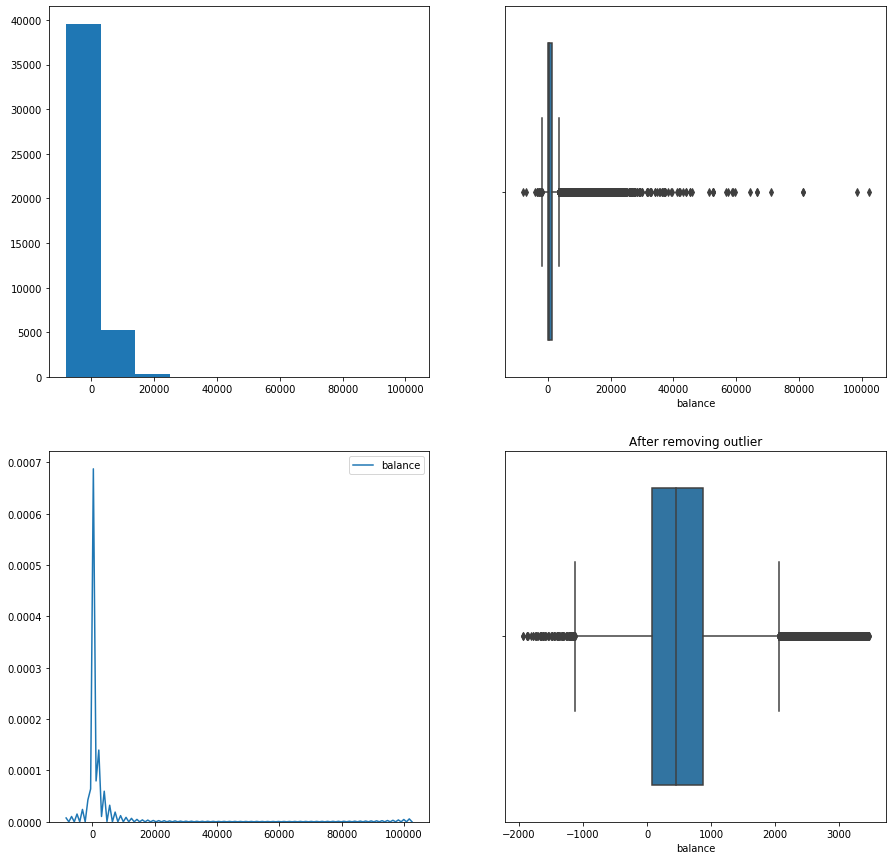

In [38]:
plt.figure(1,figsize=(15,15))
plt.subplot(221)   
plt.hist(df['balance'])
plt.subplot(222)
sns.boxplot(df['balance'])
plt.subplot(223)
sns.kdeplot(df['balance'])
remove_outlier(df,'balance')
plt.subplot(224)
plt.title("After removing outlier")
sns.boxplot(df['balance'])

# Appling Bucket of Age Coloum

In [39]:
def Age_estimator(i):
    a = 0
    if i<30:
        a = 20
    elif i>=30 and i<39:
        a = 30
    elif i>=40 and i<49:
        a = 40
    elif i>=50 and i<59:
        a = 50
    else:
        a = 60
    return a

In [40]:
df['age'] = df.age.apply(lambda x: Age_estimator(x))

In [41]:
df.head()

,age,job,education,default,housing,loan,day,month,duration,campaign,...,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,balance
0,50,9,0.150064,0,1,0,0.112565,0.067195,4.35,0.145976,...,1,0,0,0,1,0,0,0,1,2143.0
1,40,5,0.105594,0,1,0,0.112565,0.067195,2.52,0.145976,...,0,1,0,0,1,0,0,0,1,29.0
2,30,2,0.105594,0,1,1,0.112565,0.067195,1.27,0.145976,...,1,0,0,0,1,0,0,0,1,2.0
3,40,1,0.135703,0,1,0,0.112565,0.067195,1.53,0.145976,...,1,0,0,0,1,0,0,0,1,1506.0
4,30,6,0.135703,0,0,0,0.112565,0.067195,3.30,0.145976,...,0,1,0,0,1,0,0,0,1,1.0


In [42]:
df.columns

Index(['age', 'job', 'education', 'default', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'Target',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'balance'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
y_res =  df["Target"]
X_res = df.drop(columns=['Target'],axis=1)




# As per EDA i found that data is highly unblanced so i am appling Randomoversampler for balancing the data 

In [45]:
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [46]:
os = RandomOverSampler()
X_res,y_res = os.fit_sample(X_res,y_res)

In [47]:
X_res.shape

(79720, 23)

In [48]:
# Principal component analysis
pca = PCA(n_components = 2)
pca_2d = pca.fit_transform(X_res)

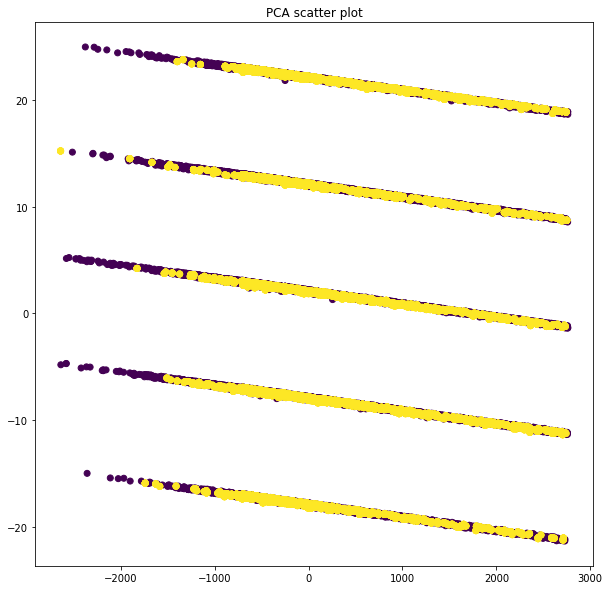

In [50]:
plt.figure(figsize = (10, 10))
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = y_res)
plt.title('PCA scatter plot')
plt.show()

perplexity: 2
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 79720 samples in 0.306s...
[t-SNE] Computed neighbors for 79720 samples in 1.687s...
[t-SNE] Computed conditional probabilities for sample 1000 / 79720
[t-SNE] Computed conditional probabilities for sample 2000 / 79720
[t-SNE] Computed conditional probabilities for sample 3000 / 79720
[t-SNE] Computed conditional probabilities for sample 4000 / 79720
[t-SNE] Computed conditional probabilities for sample 5000 / 79720
[t-SNE] Computed conditional probabilities for sample 6000 / 79720
[t-SNE] Computed conditional probabilities for sample 7000 / 79720
[t-SNE] Computed conditional probabilities for sample 8000 / 79720
[t-SNE] Computed conditional probabilities for sample 9000 / 79720
[t-SNE] Computed conditional probabilities for sample 10000 / 79720
[t-SNE] Computed conditional probabilities for sample 11000 / 79720
[t-SNE] Computed conditional probabilities for sample 12000 / 79720
[t-SNE] Computed conditional probabil

[t-SNE] Computed conditional probabilities for sample 43000 / 79720
[t-SNE] Computed conditional probabilities for sample 44000 / 79720
[t-SNE] Computed conditional probabilities for sample 45000 / 79720
[t-SNE] Computed conditional probabilities for sample 46000 / 79720
[t-SNE] Computed conditional probabilities for sample 47000 / 79720
[t-SNE] Computed conditional probabilities for sample 48000 / 79720
[t-SNE] Computed conditional probabilities for sample 49000 / 79720
[t-SNE] Computed conditional probabilities for sample 50000 / 79720
[t-SNE] Computed conditional probabilities for sample 51000 / 79720
[t-SNE] Computed conditional probabilities for sample 52000 / 79720
[t-SNE] Computed conditional probabilities for sample 53000 / 79720
[t-SNE] Computed conditional probabilities for sample 54000 / 79720
[t-SNE] Computed conditional probabilities for sample 55000 / 79720
[t-SNE] Computed conditional probabilities for sample 56000 / 79720
[t-SNE] Computed conditional probabilities for s

[t-SNE] KL divergence after 250 iterations with early exaggeration: 100.547203
[t-SNE] KL divergence after 1000 iterations: 2.592522
perplexity: 30
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 79720 samples in 0.657s...
[t-SNE] Computed neighbors for 79720 samples in 5.322s...
[t-SNE] Computed conditional probabilities for sample 1000 / 79720
[t-SNE] Computed conditional probabilities for sample 2000 / 79720
[t-SNE] Computed conditional probabilities for sample 3000 / 79720
[t-SNE] Computed conditional probabilities for sample 4000 / 79720
[t-SNE] Computed conditional probabilities for sample 5000 / 79720
[t-SNE] Computed conditional probabilities for sample 6000 / 79720
[t-SNE] Computed conditional probabilities for sample 7000 / 79720
[t-SNE] Computed conditional probabilities for sample 8000 / 79720
[t-SNE] Computed conditional probabilities for sample 9000 / 79720
[t-SNE] Computed conditional probabilities for sample 10000 / 79720
[t-SNE] Computed conditional probabili

[t-SNE] Computed conditional probabilities for sample 33000 / 79720
[t-SNE] Computed conditional probabilities for sample 34000 / 79720
[t-SNE] Computed conditional probabilities for sample 35000 / 79720
[t-SNE] Computed conditional probabilities for sample 36000 / 79720
[t-SNE] Computed conditional probabilities for sample 37000 / 79720
[t-SNE] Computed conditional probabilities for sample 38000 / 79720
[t-SNE] Computed conditional probabilities for sample 39000 / 79720
[t-SNE] Computed conditional probabilities for sample 40000 / 79720
[t-SNE] Computed conditional probabilities for sample 41000 / 79720
[t-SNE] Computed conditional probabilities for sample 42000 / 79720
[t-SNE] Computed conditional probabilities for sample 43000 / 79720
[t-SNE] Computed conditional probabilities for sample 44000 / 79720
[t-SNE] Computed conditional probabilities for sample 45000 / 79720
[t-SNE] Computed conditional probabilities for sample 46000 / 79720
[t-SNE] Computed conditional probabilities for s

[t-SNE] Computed conditional probabilities for sample 79000 / 79720
[t-SNE] Computed conditional probabilities for sample 79720 / 79720
[t-SNE] Mean sigma: 2.619770
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.573875
[t-SNE] KL divergence after 1000 iterations: 1.280533


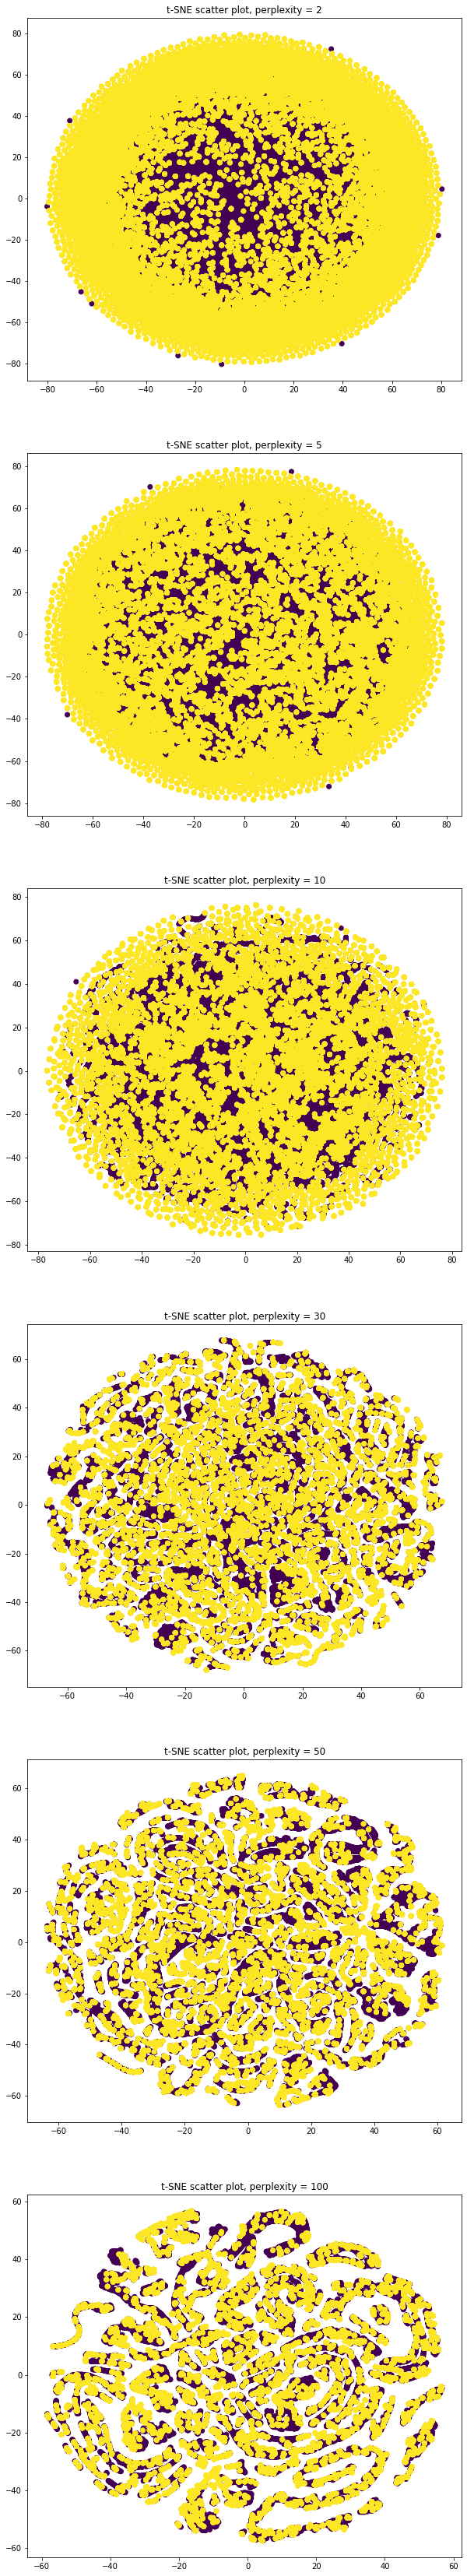

In [51]:
perplexities = (2, 5, 10, 30, 50, 100)
plt.figure(figsize = (10, 10*len(perplexities)))
for i, perplex in enumerate(perplexities):
    print('perplexity: {}'.format(perplex))
    tsne = TSNE(n_components = 2, perplexity = perplex, n_iter = 1000, verbose = 1)
    tsne_2d = tsne.fit_transform(X_res)
    
    plt.subplot(int('{}1{}'.format(len(perplexities), i+1)))
    plt.title('t-SNE scatter plot, perplexity = {}'.format(perplex))
    plt.scatter(tsne_2d[:,0], tsne_2d[:,1], c = y_res)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size = 0.1, random_state = 0)


In [53]:
# Deep learning Keras stuff
from keras.models import Sequential
from keras.layers import Dense, Activation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

model = Sequential()
model.add(Dense(32, input_dim = 23, init = 'uniform'))
model.add(Activation('relu'))
model.add(Dense(16, init = 'uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, init = 'uniform'))

model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.fit(scaler.transform(X_train), y_train, nb_epoch = 20, batch_size = 10)

/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, input_dim=23, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, kernel_initializer="uniform")`
  del sys.path[0]
/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/20
71748/71748 [==============================] - 6s 82us/step - loss: 7.7028 - accuracy: 0.5006
Epoch 2/20
71748/71748 [==============================] - 6s 86us/step - loss: 7.7028 - accuracy: 0.5006
Epoch 3/20
71748/71748 [==============================] - 6s 78us/step - loss: 7.7028 - accuracy: 0.5006
Epoch 4/20
71748/71748 [==============================] - 5s 74us/step - loss: 7.7028 - accuracy: 0.5006
Epoch 5/20
71748/71748 [==============================] - 6s 85us/step - loss: 7.7028 - accuracy: 0.5006
Epoch 6/20
71748/71748 [==============================] - 6s 78us/step - loss: 7.7028 - accuracy: 0.5006
Epoch 7/20
71748/71748 [==============================] - 5s 77us/step - loss: 7.7028 - accuracy: 0.5006
Epoch 8/20
71748/71748 [==============================] - 6s 85us/step - loss: 7.7028 - accuracy: 0.5006
Epoch 9/20
71748/71748 [==============================] - 6s 79us/step - loss: 7.7028 - accuracy: 0.5006
Epoch 10/20
71748/71748 [==============================

In [54]:
y_keras_pred = model.predict_classes(scaler.transform(X_test))
print('Accuracy: {}'.format(np.sum(y_keras_pred[:,0] == y_test) / float(len(y_test))))

Accuracy: 0.49435524335173103


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_keras_pred, y_test)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[3941 4031]
 [   0    0]]
Accuracy: 49.435524335173106%


In [56]:
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test,y_keras_pred))
print(confusion_matrix(y_test,y_keras_pred))
print(classification_report(y_test,y_keras_pred))

0.49435524335173103
[[3941    0]
 [4031    0]]
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      3941
           1       0.00      0.00      0.00      4031

    accuracy                           0.49      7972
   macro avg       0.25      0.50      0.33      7972
weighted avg       0.24      0.49      0.33      7972



/home/nitin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
